# Computational Methods for Finance Course Work

In [486]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import scipy.stats as si

In [187]:
initial_data = yf.download("GOOG, ^VIX", start="2020-11-17", end="2021-11-17")

[*********************100%***********************]  2 of 2 completed


In [176]:
initial_data.head()

Adj Close                   Close                    High  \
                   GOOG       ^VIX         GOOG       ^VIX         GOOG   
Date                                                                      
2020-11-16  1781.380005  22.450001  1781.380005  22.450001  1799.069946   
2020-11-17  1770.150024  22.709999  1770.150024  22.709999  1785.000000   
2020-11-18  1746.780029  23.840000  1746.780029  23.840000  1773.469971   
2020-11-19  1763.920044  23.110001  1763.920044  23.110001  1769.589966   
2020-11-20  1742.189941  23.700001  1742.189941  23.700001  1774.000000   

                           Low                    Open              Volume  \
             ^VIX         GOOG       ^VIX         GOOG       ^VIX     GOOG   
Date                                                                         
2020-11-16  24.08  1767.689941  22.430000  1771.699951  23.660000  1246800   
2020-11-17  24.09  1767.000000  22.340000  1776.939941  22.840000  1147100   
2020-11-18  23.92  1746.140015  21.660000  1765.229980  22.860001  1173500   
2020-11-19  24.52  1737.005005  22.559999  1738.380005  23.620001  1249900   
2020-11-20  23.73  1741.859985  22.129999  1765.209961  23.430000  2313500   

                 
           ^VIX  
Date             
2020-11-16    0  
2020-11-17    0  
2020-11-18    0  
2020-11-19    0  
2020-11-20    0

In [177]:
initial_data['Adj Close'].head()

,GOOG,^VIX
Date,,
2020-11-16,1781.380005,22.450001
2020-11-17,1770.150024,22.709999
2020-11-18,1746.780029,23.840000
2020-11-19,1763.920044,23.110001
2020-11-20,1742.189941,23.700001


In [178]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-11-16 to 2021-11-16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    253 non-null    float64
 1   ^VIX    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [179]:
data.head()

,GOOG,^VIX
Date,,
2020-11-16,1781.380005,22.450001
2020-11-17,1770.150024,22.709999
2020-11-18,1746.780029,23.840000
2020-11-19,1763.920044,23.110001
2020-11-20,1742.189941,23.700001


In [180]:
data.tail()

,GOOG,^VIX
Date,,
2021-11-10,2932.520020,18.730000
2021-11-11,2934.959961,17.660000
2021-11-12,2992.909912,16.290001
2021-11-15,2987.760010,16.490000
2021-11-16,2981.520020,16.370001


In [286]:
print('The spot price is', round(data[-1],2), 'USD')

The spot price is 2981.52 USD


## Volatility

In [310]:
GOOG_data = yf.download("GOOG", start="2020-11-17", end="2021-11-17")

[*********************100%***********************]  1 of 1 completed


In [311]:
google_data = GOOG_data['Adj Close']

In [312]:
log_return_google = np.log(google_data / google_data.shift(1))

In [313]:
google_data_vol = np.sqrt(252) * log_return_google.std()
print('The annualised volatility is', round(google_data_vol*100,2), '%')

The annualised volatility is 23.17 %


In [229]:
first6months_data = yf.download("GOOG", start="2020-11-17", end="2021-05-17")

[*********************100%***********************]  1 of 1 completed


In [234]:
first6months_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-10,2374.889893,2378.000000,2334.729980,2341.659912,2341.659912,1300300
2021-05-11,2291.860107,2322.000000,2283.000000,2308.760010,2308.760010,1605500
2021-05-12,2261.709961,2285.370117,2230.050049,2239.080078,2239.080078,1746700
2021-05-13,2261.090088,2276.601074,2242.719971,2261.969971,2261.969971,1333500
2021-05-14,2291.830078,2321.139893,2283.320068,2316.159912,2316.159912,1331200


In [242]:
data_2 = first6months_data['Adj Close']

In [237]:
log_return_2 = np.log(data_2 / data_2.shift(1))

In [260]:
first6months_vol = np.sqrt(252) * log_return_2.std()
print('The first 6 months volatility is', round(first6months_vol*100,2), '%')

The first 6 months volatility is 26.89 %


In [251]:
last6months_data = yf.download("GOOG", start="2021-05-17", end="2021-11-17")

[*********************100%***********************]  1 of 1 completed


In [252]:
last6months_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-10,2960.195068,2974.000000,2906.500000,2932.520020,2932.520020,1135400
2021-11-11,2942.139893,2970.044922,2933.889893,2934.959961,2934.959961,623200
2021-11-12,2956.629883,2997.189941,2929.080078,2992.909912,2992.909912,852000
2021-11-15,3000.000000,3009.540039,2973.050049,2987.760010,2987.760010,812400
2021-11-16,2983.409912,2996.649902,2967.000000,2981.520020,2981.520020,862700


In [253]:
data_3 = last6months_data['Adj Close']

In [254]:
log_return_3 = np.log(data_3 / data_3.shift(1))

In [261]:
last6months_vol = np.sqrt(252) * log_return_3.std()
print('The last 6 months volatility is', round(last6months_vol*100,2), '%')

The last 6 months volatility is 19.14 %


In [263]:
VIX = yf.download("^VIX", start="2020-11-17", end="2021-11-17")

[*********************100%***********************]  1 of 1 completed


In [264]:
VIX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-10,17.740000,19.900000,17.219999,18.730000,18.730000,0
2021-11-11,18.340000,18.389999,17.270000,17.660000,17.660000,0
2021-11-12,17.490000,17.690001,16.150000,16.290001,16.290001,0
2021-11-15,17.030001,17.459999,16.490000,16.490000,16.490000,0
2021-11-16,16.860001,17.080000,16.030001,16.370001,16.370001,0


In [265]:
data_vix = VIX['Adj Close']

In [266]:
log_return_4 = np.log(data_vix / data_vix.shift(1))

In [268]:
vix_vol = np.sqrt(252) * log_return_4.std()
print('The market volatility is', round(vix_vol*100,2), '%')

The market volatility is 128.32 %


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

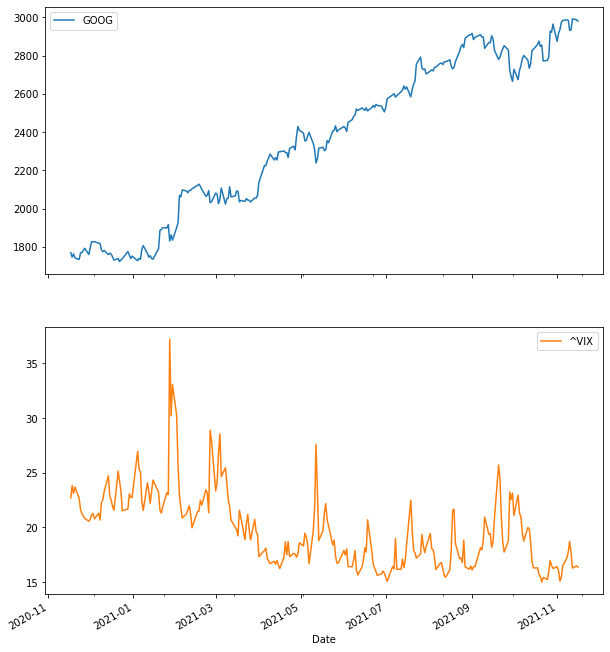

In [743]:
data.plot(figsize=(10, 12), subplots=True)

## Summary Statistics

In [744]:
data.describe().round(2)

,GOOG,^VIX
count,252.00,252.00
mean,2369.04,19.79
std,402.28,3.43
min,1723.50,15.01
25%,2051.80,17.01
50%,2400.60,18.94
75%,2746.28,21.86
max,2992.91,37.21


## Changes over Time

In [745]:
data.diff().head()

,GOOG,^VIX
Date,,
2020-11-17,NaN,NaN
2020-11-18,-23.369995,1.130001
2020-11-19,17.140015,-0.730000
2020-11-20,-21.730103,0.590000
2020-11-23,-7.329956,-1.040001


In [746]:
data.diff().describe().round(2)

,GOOG,^VIX
count,251.00,251.00
mean,4.83,-0.03
std,33.60,1.88
min,-106.34,-7.00
25%,-12.57,-0.93
50%,5.50,-0.21
75%,20.42,0.74
max,142.56,14.19


In [749]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,GOOG,^VIX
Date,,
2020-11-17,NaN,NaN
2020-11-18,-0.0133,0.0486
2020-11-19,0.0098,-0.0311
2020-11-20,-0.0124,0.0252
2020-11-23,-0.0042,-0.0449


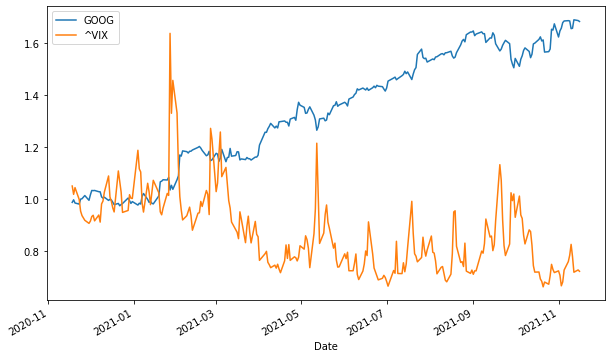

In [750]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Resampling

In [752]:
data.resample('1w', label='right').last().head()

,GOOG,^VIX
Date,,
2020-11-22,1742.189941,23.700001
2020-11-29,1793.189941,20.840000
2020-12-06,1827.989990,20.790001
2020-12-13,1781.770020,23.309999
2020-12-20,1731.010010,21.570000


In [753]:
data.resample('1m', label='right').last().head()

,GOOG,^VIX
Date,,
2020-11-30,1760.739990,20.570000
2020-12-31,1751.880005,22.750000
2021-01-31,1835.739990,33.090000
2021-02-28,2036.859985,27.950001
2021-03-31,2068.629883,19.400000


<AxesSubplot:xlabel='Date'>

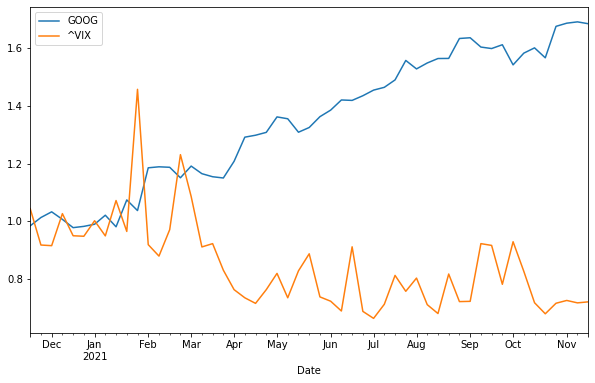

In [754]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

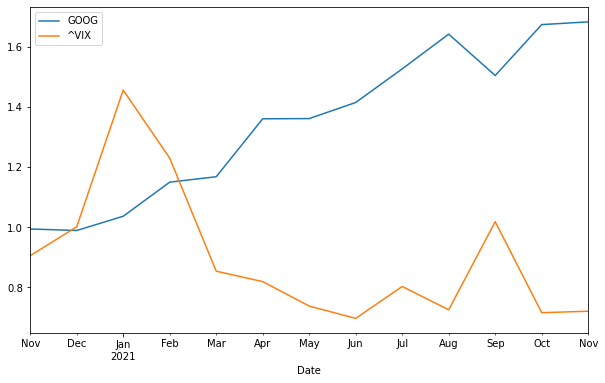

In [755]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

## Rolling Statistics

In [571]:
GOOG_data = pd.DataFrame(data).dropna()
GOOG_data.tail()

,GOOG,^VIX
Date,,
2021-11-10,2932.520020,18.730000
2021-11-11,2934.959961,17.660000
2021-11-12,2992.909912,16.290001
2021-11-15,2987.760010,16.490000
2021-11-16,2981.520020,16.370001


In [574]:
window = 20
GOOG_data['min'] = data[sym].rolling(window=window).min()
GOOG_data['mean'] = data[sym].rolling(window=window).mean()
GOOG_data['std'] = data[sym].rolling(window=window).std()
GOOG_data['median'] = data[sym].rolling(window=window).median()
GOOG_data['median'] = data[sym].rolling(window=window).median()
GOOG_data['median'] = data[sym].rolling(window=window).median()
GOOG_data['max'] = data[sym].rolling(window=window).max()
GOOG_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
GOOG_data.dropna()

,GOOG,^VIX,min,mean,std,median,max,ewma
Date,,,,,,,,
2020-12-15,1767.770020,22.889999,1734.859985,1782.002002,29.325276,1773.380005,1827.989990,1767.167461
2020-12-16,1763.000000,22.500000,1734.859985,1781.644501,29.520301,1773.380005,1827.989990,1764.041865
2020-12-17,1747.900024,21.930000,1734.859985,1781.700500,29.451665,1773.380005,1827.989990,1751.935485
2020-12-18,1731.010010,21.570000,1731.010010,1780.054999,31.355213,1773.380005,1827.989990,1736.241378
2020-12-21,1739.369995,25.160000,1731.010010,1779.914001,31.540240,1773.380005,1827.989990,1738.587841
...,...,...,...,...,...,...,...,...
2021-11-10,2932.520020,18.730000,2772.500000,2892.539001,70.598305,2896.849976,2987.030029,2945.640269
2021-11-11,2934.959961,17.660000,2772.500000,2897.875000,69.507292,2919.920044,2987.030029,2937.630038
2021-11-12,2992.909912,16.290001,2772.500000,2905.845496,70.863445,2925.565063,2992.909912,2979.089944


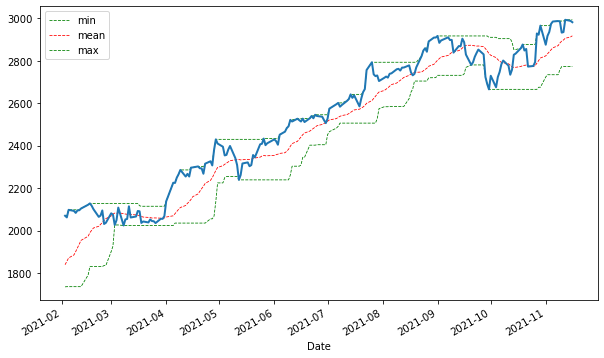

In [576]:
ax = GOOG_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [578]:
GOOG_data['SMA1'] = data[sym].rolling(window=20).mean()
GOOG_data['SMA2'] = data[sym].rolling(window=60).mean()
GOOG_data[[sym, 'SMA1', 'SMA2']].tail()

,GOOG,SMA1,SMA2
Date,,,
2021-11-10,2932.520020,2892.539001,2841.497664
2021-11-11,2934.959961,2897.875000,2844.890332
2021-11-12,2992.909912,2905.845496,2849.134330
2021-11-15,2987.760010,2912.272998,2852.784664
2021-11-16,2981.520020,2917.527002,2855.443498


<AxesSubplot:xlabel='Date'>

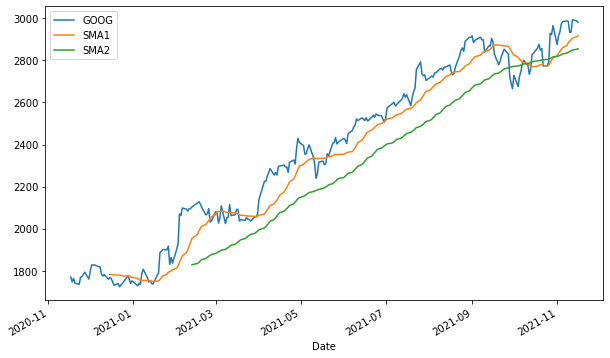

In [579]:
GOOG_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

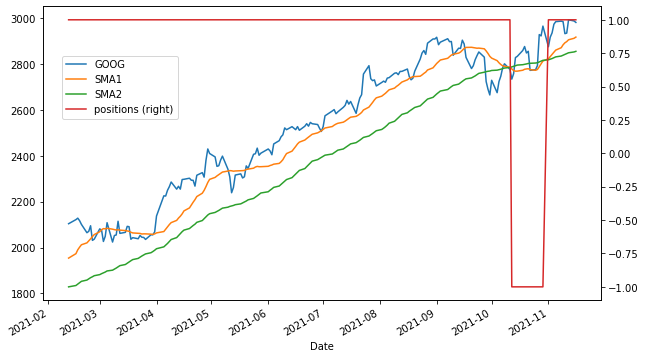

In [580]:
GOOG_data.dropna(inplace=True)
GOOG_data['positions'] = np.where(GOOG_data['SMA1'] > GOOG_data['SMA2'],1,-1)
ax = GOOG_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Correlation Analysis

In [759]:
Corr_data = data[['GOOG', '^VIX']].dropna()
Corr_data.tail()

,GOOG,^VIX
Date,,
2021-11-10,2932.520020,18.730000
2021-11-11,2934.959961,17.660000
2021-11-12,2992.909912,16.290001
2021-11-15,2987.760010,16.490000
2021-11-16,2981.520020,16.370001


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

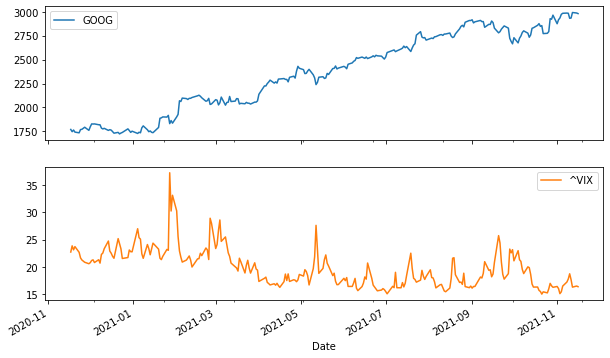

In [760]:
Corr_data.plot(subplots=True, figsize=(10, 6))

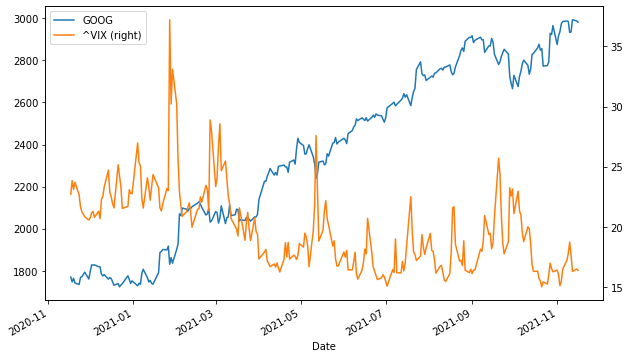

In [761]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

## Logarithmic Returns

In [762]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,GOOG,^VIX
Date,,
2020-11-17,NaN,NaN
2020-11-18,-0.013290,0.048560
2020-11-19,0.009765,-0.031099
2020-11-20,-0.012396,0.025210
2020-11-23,-0.004216,-0.044874


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

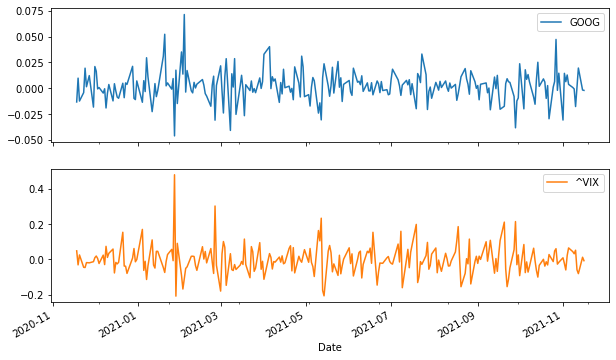

In [763]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='GOOG', ylabel='GOOG'>,
        <AxesSubplot:xlabel='^VIX', ylabel='GOOG'>],
       [<AxesSubplot:xlabel='GOOG', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

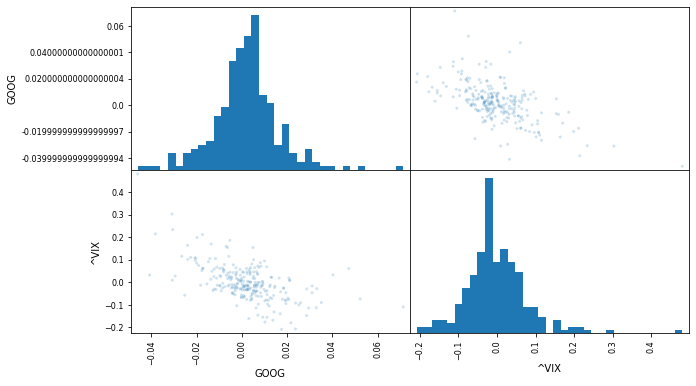

In [764]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

### OLS Regression

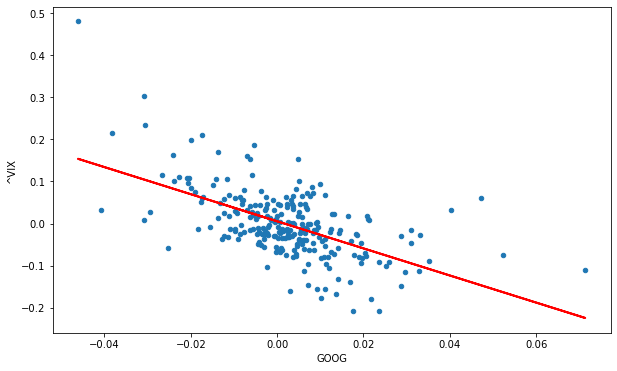

In [766]:
reg = np.polyfit(sprets['GOOG'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='GOOG', y='^VIX', figsize=(10, 6))
ax.plot(sprets['GOOG'], np.polyval(reg, sprets['GOOG']), 'r', lw=2);

In [767]:
sprets.corr()

,GOOG,^VIX
GOOG,1.000000,-0.581014
^VIX,-0.581014,1.000000


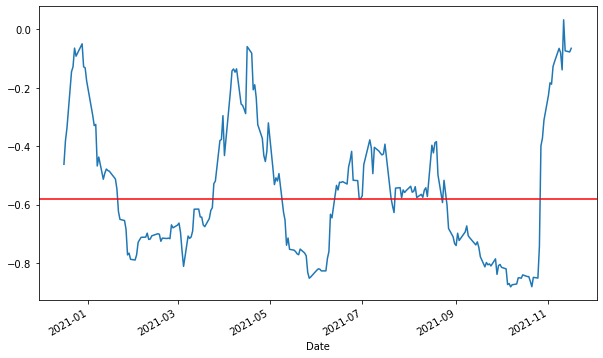

In [769]:
ax = sprets['GOOG'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');

## Methodology 1 - Monte Carlo Simulation

In [329]:
import numpy as np

In [330]:
S0 = 2981.52            # spot stock price
K = 2950               # strike
T = 1/12                # maturity 
r = 0.0158                 # risk free rate 
sig = 0.2317               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "call"          # payoff 

In [331]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [332]:
T = 4/52
r = 0.0158
sigma = 0.2317
S0 = 2981.52
K = 2950

In [333]:
S = mcs_simulation_np(1000)

In [334]:
S = np.transpose(S)
S

array([[2981.52      , 2969.86543944, 2970.85334595, ..., 2916.16094059,
        2909.63295017, 2912.79047073],
       [2981.52      , 2976.91245887, 2974.46575599, ..., 2834.94759583,
        2844.99893789, 2841.23879409],
       [2981.52      , 2986.08699197, 2995.90981625, ..., 2929.00924444,
        2925.73578938, 2921.36002033],
       ...,
       [2981.52      , 2970.16975687, 2968.48990767, ..., 2892.76639253,
        2897.85134354, 2898.31773807],
       [2981.52      , 2964.82065281, 2966.28700826, ..., 3119.09750049,
        3127.51391177, 3138.63539884],
       [2981.52      , 2986.19354357, 2991.40694242, ..., 2879.04578295,
        2885.39285673, 2888.76293222]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

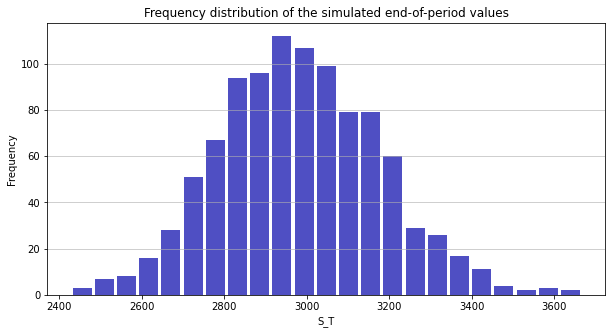

In [335]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [337]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 95.81646892647285


In [338]:
S = mcs_simulation_np(100)
S = np.transpose(S)
S
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 74.48447699659158


In [339]:
S = mcs_simulation_np(10000)
S = np.transpose(S)
S
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 94.4584936348299


# Methodology 2 - Black Scholes 

### Non-Dividend Paying European Options

In [129]:
import scipy.stats as si
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [130]:
def euro_option_bsm(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return option_value

In [348]:
call = euro_option_bsm(2981.52, 2950, 4/52, 0.0158, 0.2317, 'call')
print('The BS call price with annualized volatility is', round(call, 2))

The BS call price with annualized volatility is 94.81


In [349]:
first6mvol_call = euro_option_bsm(2981.52, 2950, 4/52, 0.0158, 0.2689, 'call')
print('The BS call price with the first 6 months volatility for is', round(first6mvol_call, 2))

The BS call price with the first 6 months volatility for is 106.83


In [350]:
last6mvol_call = euro_option_bsm(2981.52, 2950, 4/52, 0.0158, 0.1914, 'call')
print('The BS call price with the last 6 months volatility is', round(last6mvol_call, 2))

The BS call price with the last 6 months volatility is 81.87


In [351]:
S = np.linspace(2500,3500,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bsm(S[i], 2981.52, 1, 0.0158, 0.2317, 'call')

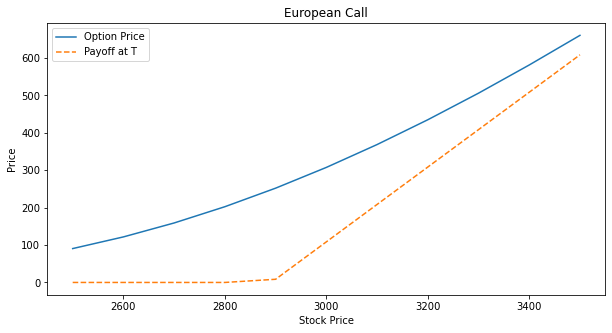

In [352]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-2891.52,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [359]:
T = np.linspace(0.01,1,51)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(2950, 2981.52, T[i], 0.0158, 0.2317, 'call')

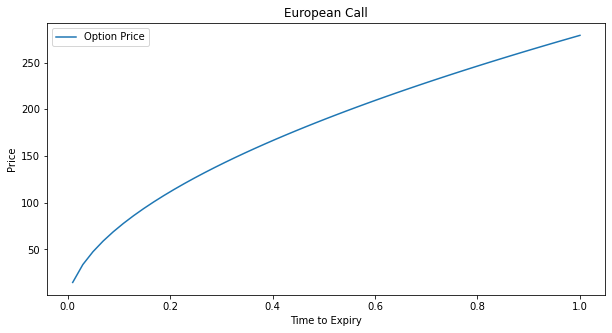

In [360]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

In [494]:
GOOG = yf.Ticker('GOOG')
opt = GOOG.option_chain('2021-12-17')
opt.calls.loc[111:121]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
111,GOOG211217C02950000,2021-12-03 20:56:25,2950.0,30.71,28.9,31.8,-5.290001,-14.694447,60.0,1045,0.323936,False,REGULAR,USD
112,GOOG211217C02960000,2021-12-03 20:59:45,2960.0,28.00,25.9,28.6,-6.700001,-19.308360,9.0,15,0.321036,False,REGULAR,USD
113,GOOG211217C02975000,2021-12-03 19:03:57,2975.0,23.10,21.8,24.4,-4.600000,-16.606499,12.0,26,0.317840,False,REGULAR,USD
114,GOOG211217C02980000,2021-12-03 20:59:12,2980.0,22.70,20.7,23.1,-5.429998,-19.303230,16.0,21,0.316779,False,REGULAR,USD
115,GOOG211217C02985000,2021-12-03 14:51:27,2985.0,26.10,19.4,21.9,0.840000,3.325416,2.0,22,0.316016,False,REGULAR,USD
116,GOOG211217C02990000,2021-12-03 20:28:07,2990.0,20.20,18.3,20.7,-3.900000,-16.182570,32.0,25,0.314979,False,REGULAR,USD
117,GOOG211217C02995000,2021-12-03 20:28:07,2995.0,19.11,17.3,19.6,-3.459999,-15.330081,34.0,11,0.314277,False,REGULAR,USD
118,GOOG211217C03000000,2021-12-03 20:59:26,3000.0,17.55,16.2,18.4,-5.450001,-23.695656,131.0,1928,0.312629,False,REGULAR,USD
119,GOOG211217C03005000,2021-12-03 20:39:46,3005.0,15.60,15.3,17.5,-4.400000,-21.999998,7.0,28,0.312675,False,REGULAR,USD
120,GOOG211217C03010000,2021-12-03 16:18:30,3010.0,13.87,14.4,16.5,-7.400001,-34.790787,30.0,26,0.311774,False,REGULAR,USD


In [495]:
data = yf.download("GOOG", start="2020-11-17", end="2021-11-17")

[*********************100%***********************]  1 of 1 completed


In [496]:
data['Adj Close']

Date
2020-11-16    1781.380005
2020-11-17    1770.150024
2020-11-18    1746.780029
2020-11-19    1763.920044
2020-11-20    1742.189941
                 ...     
2021-11-10    2932.520020
2021-11-11    2934.959961
2021-11-12    2992.909912
2021-11-15    2987.760010
2021-11-16    2981.520020
Name: Adj Close, Length: 253, dtype: float64

In [497]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 4/52
r = 0.0158
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 23.17 %


In [498]:
GOOG_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    GOOG_bsm_call [i] = euro_option_bsm(S, K[i], T, r, vol, 'call')

In [499]:
opt.calls['BSMPrice'] = pd.DataFrame(GOOG_bsm_call).round(2)
opt.calls.loc[111:121]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
111,GOOG211217C02950000,2021-12-03 20:56:25,2950.0,30.71,28.9,31.8,-5.290001,-14.694447,60.0,1045,0.323936,False,REGULAR,USD,94.82
112,GOOG211217C02960000,2021-12-03 20:59:45,2960.0,28.00,25.9,28.6,-6.700001,-19.308360,9.0,15,0.321036,False,REGULAR,USD,89.33
113,GOOG211217C02975000,2021-12-03 19:03:57,2975.0,23.10,21.8,24.4,-4.600000,-16.606499,12.0,26,0.317840,False,REGULAR,USD,81.48
114,GOOG211217C02980000,2021-12-03 20:59:12,2980.0,22.70,20.7,23.1,-5.429998,-19.303230,16.0,21,0.316779,False,REGULAR,USD,78.96
115,GOOG211217C02985000,2021-12-03 14:51:27,2985.0,26.10,19.4,21.9,0.840000,3.325416,2.0,22,0.316016,False,REGULAR,USD,76.50
116,GOOG211217C02990000,2021-12-03 20:28:07,2990.0,20.20,18.3,20.7,-3.900000,-16.182570,32.0,25,0.314979,False,REGULAR,USD,74.09
117,GOOG211217C02995000,2021-12-03 20:28:07,2995.0,19.11,17.3,19.6,-3.459999,-15.330081,34.0,11,0.314277,False,REGULAR,USD,71.74
118,GOOG211217C03000000,2021-12-03 20:59:26,3000.0,17.55,16.2,18.4,-5.450001,-23.695656,131.0,1928,0.312629,False,REGULAR,USD,69.43
119,GOOG211217C03005000,2021-12-03 20:39:46,3005.0,15.60,15.3,17.5,-4.400000,-21.999998,7.0,28,0.312675,False,REGULAR,USD,67.18
120,GOOG211217C03010000,2021-12-03 16:18:30,3010.0,13.87,14.4,16.5,-7.400001,-34.790787,30.0,26,0.311774,False,REGULAR,USD,64.98


In [500]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error'].loc[111:121]

111   -67.612318
112   -68.655547
113   -71.649485
114   -71.251266
115   -65.882353
116   -72.735862
117   -73.362141
118   -74.722742
119   -76.778803
120   -78.654971
121   -69.595670
Name: estimate_error, dtype: float64

### Black-Scholes model (MibianLib)

In [501]:
pip install mibian

Note: you may need to restart the kernel to use updated packages.


In [502]:
import mibian as mb

In [503]:
option_2950 = mb.BS([S, 2950, r*100, 30], volatility = vol*100)

In [512]:
option_2950.callPrice
print('The BS MibianLib call price with annualised volatility is', round(option_2950.callPrice, 2))

The BS MibianLib call price with annualised volatility is 97.47


In [443]:
GOOG_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    GOOG_mb_bsm_call [i] = mb.Me([S, K[i], r*100, 0*100, 30], volatility = vol*100).callPrice

In [474]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(GOOG_mb_bsm_call).round(2)
opt.calls.loc[111:121]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
111,GOOG211217C02950000,2021-12-02 17:02:52,2950.0,35.50,36.1,37.6,3.799999,11.987379,29.0,1063,0.274894,False,REGULAR,USD,94.82,-62.560641,97.47
112,GOOG211217C02960000,2021-12-02 16:34:33,2960.0,31.00,33.0,34.6,1.760000,6.019153,2.0,12,0.275665,False,REGULAR,USD,89.33,-65.297213,92.00
113,GOOG211217C02975000,2021-12-02 16:43:49,2975.0,27.70,28.1,29.3,1.600000,6.130269,1.0,26,0.271225,False,REGULAR,USD,81.48,-66.003927,84.17
114,GOOG211217C02980000,2021-12-01 19:12:43,2980.0,26.40,26.5,27.9,-1.340000,-4.830570,1.0,19,0.270958,False,REGULAR,USD,78.96,-66.565350,81.66
115,GOOG211217C02985000,2021-12-02 16:10:35,2985.0,25.26,25.3,26.6,3.450001,15.818435,9.0,15,0.270935,False,REGULAR,USD,76.50,-66.980392,79.20
116,GOOG211217C02990000,2021-12-02 14:56:56,2990.0,24.10,24.1,25.4,1.860001,8.363312,1.0,26,0.271186,False,REGULAR,USD,74.09,-67.471994,76.79
117,GOOG211217C02995000,2021-12-02 14:44:06,2995.0,22.57,22.7,24.0,-2.830000,-11.141732,3.0,9,0.270164,False,REGULAR,USD,71.74,-68.539169,74.43
118,GOOG211217C03000000,2021-12-02 17:06:57,3000.0,22.50,21.6,22.9,3.790001,20.256554,41.0,1928,0.270446,False,REGULAR,USD,69.43,-67.593259,72.12
119,GOOG211217C03005000,2021-12-02 16:33:17,3005.0,20.00,20.4,21.7,-5.440001,-21.383650,2.0,29,0.269966,False,REGULAR,USD,67.18,-70.229235,69.86
120,GOOG211217C03010000,2021-12-02 15:05:49,3010.0,20.00,19.6,21.0,2.000000,11.111111,1.0,28,0.271980,False,REGULAR,USD,64.98,-69.221299,67.65


In [475]:
opt.calls['estimate_error_mb'] = ((opt.calls['lastPrice'] - opt.calls['MB_BSMPrice'])/opt.calls['MB_BSMPrice'])*100
opt.calls['estimate_error_mb'].loc[111:121]

111   -63.578537
112   -66.304348
113   -67.090412
114   -67.670830
115   -68.106061
116   -68.615705
117   -69.676206
118   -68.801997
119   -71.371314
120   -70.436068
121   -68.392121
Name: estimate_error_mb, dtype: float64

In [446]:
opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     149.000000
mean       13.380952
std       280.340915
min       -82.994608
25%       -60.953952
50%       -16.947192
75%        -6.662036
max      2400.000000
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

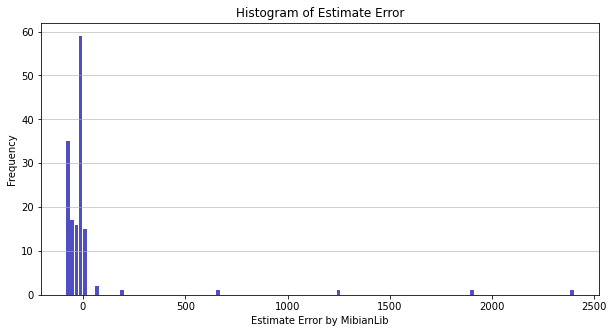

In [447]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

# Greeks

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

## Delta

In [101]:
def delta(S, K, T, r, vol, payoff):
    q = 0
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
   
    return delta

In [449]:
delta(2981.52, 2950, 4/52, 0.0158, 0.2317, 'call')

0.5856738707585117

In [452]:
S = np.linspace(2500, 3500, 51)
T = np.linspace(1/52, 1, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 2950, T[i], 0.0158, 0.2317, 'call')

/var/folders/_w/g22kv_fj4970rvncfh2yxxm00000gn/T/ipykernel_43593/3857024986.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


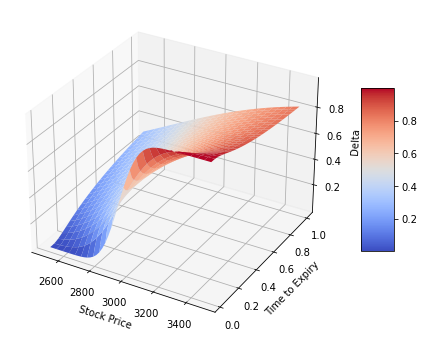

In [453]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Gamma

In [454]:
def gamma(S, K, T, r, vol, payoff):
    q = 0
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [455]:
gamma(2981.52, 2950, 4/52, 0.0158, 0.2317, 'call')

0.0020339784297041096

In [41]:
S = np.linspace(2500, 3500, 51)
T = np.linspace(1/52, 1, 51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],2950, 4/52, 0.0158, 0.2317, 'call')

/var/folders/_w/g22kv_fj4970rvncfh2yxxm00000gn/T/ipykernel_43593/3848859912.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


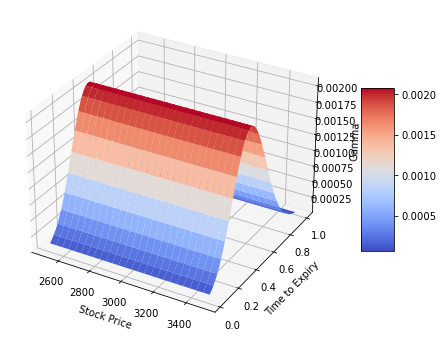

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Speed

In [44]:
def speed(S, K, T, r, vol, payoff):
    q = 0
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [456]:
speed(2981.52, 2950, 4/52, 0.0158, 0.2317, 'call')

-8.264437322716078e-07

In [54]:
S = np.linspace(2700, 3300, 51)
T = np.linspace(1/52, 6/52, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 2950, T[i], 0.0158, 0.2317, 'call')

/var/folders/_w/g22kv_fj4970rvncfh2yxxm00000gn/T/ipykernel_43593/1603304871.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


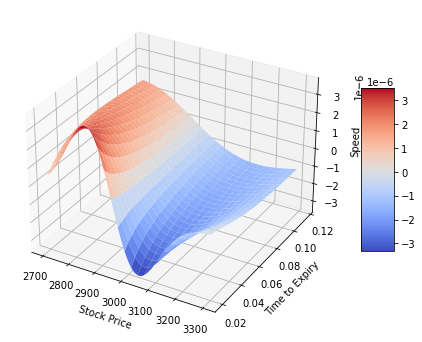

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta

In [457]:
def theta(S, K, T, r, vol, payoff):
    q = 0
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return theta

In [458]:
theta(2981.52, 2950, 4/52, 0.0158, 0.2317, 'call')

511.4294351400469

In [64]:
S = np.linspace(2700, 3300, 51)
T = np.linspace(1/52, 6/52, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 2950, T[i], 0.0158, 0.235, 'call')

/var/folders/_w/g22kv_fj4970rvncfh2yxxm00000gn/T/ipykernel_43593/383283098.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


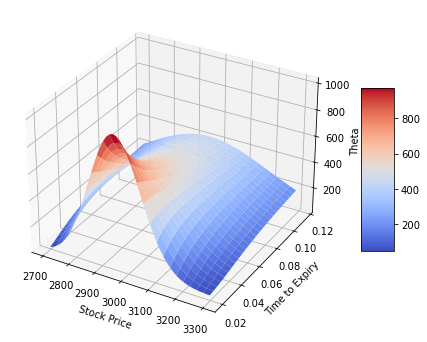

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Rho

In [459]:
def rho(S, K, T, r, vol, payoff):
    q = 0
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
   
    return rho

In [460]:
rho(2981.52, 2950, 4/52, 0.0158, 0.2317, 'call')

127.02976052446266

In [68]:
S = np.linspace(2500, 3500, 51)
T = np.linspace(1/52, 1, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 2950, T[i], 0.0158, 0.2317, 'call')

/var/folders/_w/g22kv_fj4970rvncfh2yxxm00000gn/T/ipykernel_43593/2235945349.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


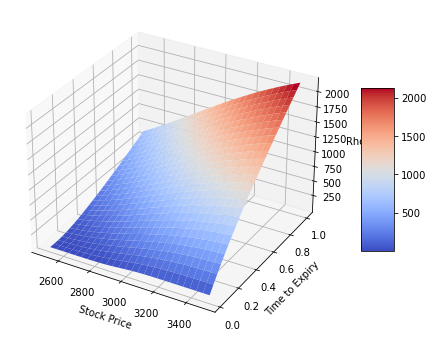

In [70]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Vega

In [461]:
def vega(S, K, T, r, vol, payoff):
    q = 0
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [462]:
vega(2981.52, 2950, 4/12, 0.0158, 0.2317, 'call')

942.0269597173769

In [83]:
S = np.linspace(2700, 3300, 51)
T = np.linspace(1/52, 6/52, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 2950, T[i], 0.0158, 0.2317, 'call')

/var/folders/_w/g22kv_fj4970rvncfh2yxxm00000gn/T/ipykernel_43593/2704700163.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


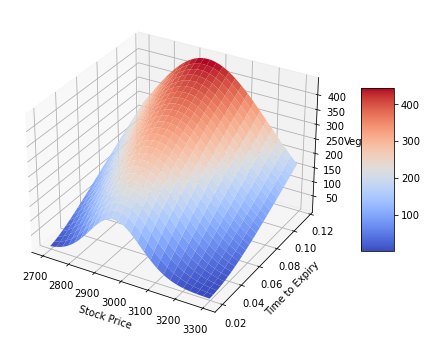

In [84]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);